<a href="https://colab.research.google.com/github/tetiana-martynenko/Python-For-DS/blob/main/hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/content/drive/MyDrive/DS_course/data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

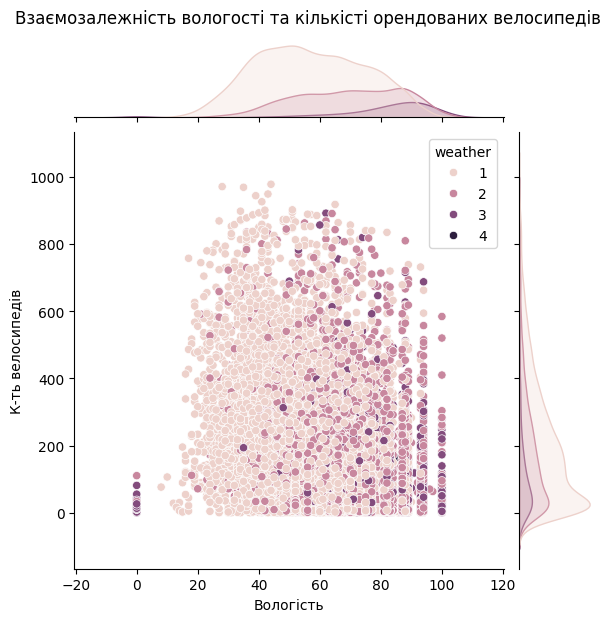

In [16]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather')
plt.suptitle('Взаємозалежність вологості та кількісті орендованих велосипедів', y=1.03)
plt.xlabel('Вологість')
plt.ylabel('К-ть велосипедів');

Висновки:
помітно, що орендують велосипеди в межах значення вологості 20-95. Дані зі значенням 0 та 100 - більше схожі на збій в даних.
Основна частина зосереджена замовлень знаходиться під станом погоди 1, тобто ясна та малохмарна погода посилює актуальність послуги. Також видно, що із погіршенням погоди, а саме посиленням опадів - збільшується вологість, та незначно, але все ж зменшується кількість орендованих велосипедів, тобто із погіршенням погодних умов - знижується попит на послугу.


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [29]:
spring_summer = df[(df.season == 1) | (df.season == 2) ]

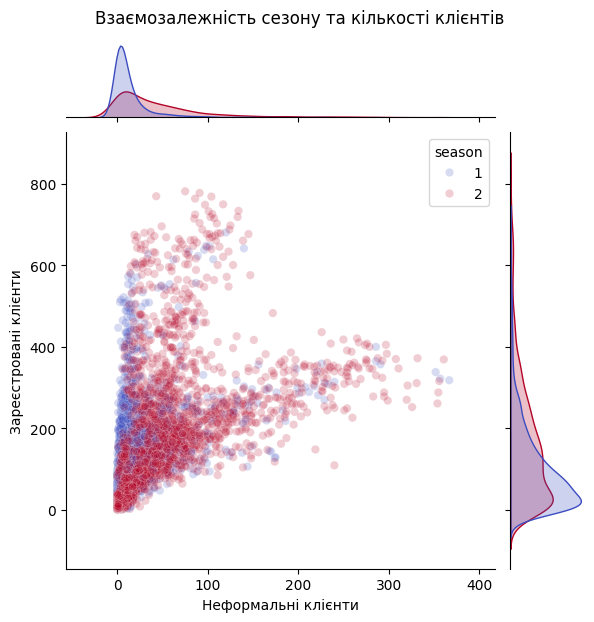

In [42]:
sns.jointplot(data=spring_summer, x='casual', y='registered',
             hue='season', alpha=.2, palette='coolwarm' )
plt.suptitle('Взаємозалежність сезону та кількості клієнтів', y=1.03)
plt.xlabel('Неформальні клієнти')
plt.ylabel('Зареєстровані клієнти');

Висновки:
чітко видно залежність, що з настанням літа збільшується кількість неформальних користувачів, у порівнянні з зареєстрованими, для яких пік, порівнюючи два сезони, є весна. Також це можна пояснити тим, що літо - сезон канікул та відпусток, тому доля зареєстрованих клієнтів падає.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


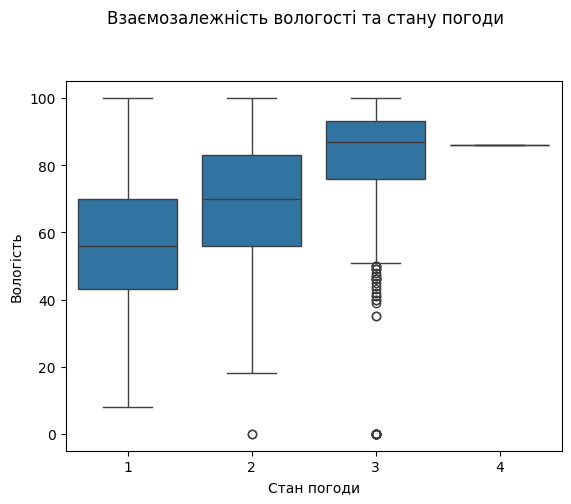

In [44]:
sns.boxplot(data=df, x='weather', y='humidity')
plt.suptitle('Взаємозалежність вологості та стану погоди', y=1.03)
plt.xlabel('Стан погоди')
plt.ylabel('Вологість');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

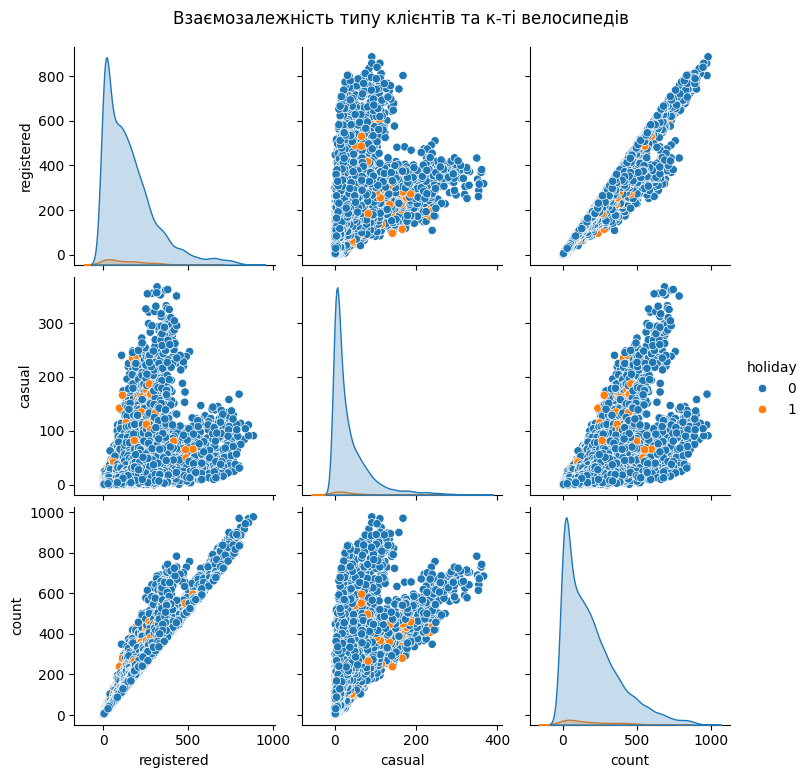

In [55]:
data_df = df[['registered', 'casual', 'count','holiday']]
sns.pairplot(data=data_df, hue='holiday')
plt.suptitle('Взаємозалежність типу клієнтів та к-ті орендованих велосипедів', y=1.03)
plt.xlabel('Стан погоди')
plt.ylabel('Вологість');

Висновки:
Основна частина замовлень - у будні дні. Залежність кількості клієнтів та к-ті велосипедів - прямопропорційна. Причому, для зареєстрованих клієнтів менш характерно "оптові" замовлення, тоді як у неформальних клієнтів - навпаки. Також, активність у свята та вихідні - пережно у неформальних клієнтів. ЩО підтверджує опис цільової аудиторії, яка використовує велосипед як засіб добирання на роботу та з неї.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [88]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [89]:
df['date'] = df.datetime.dt.date

In [95]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()

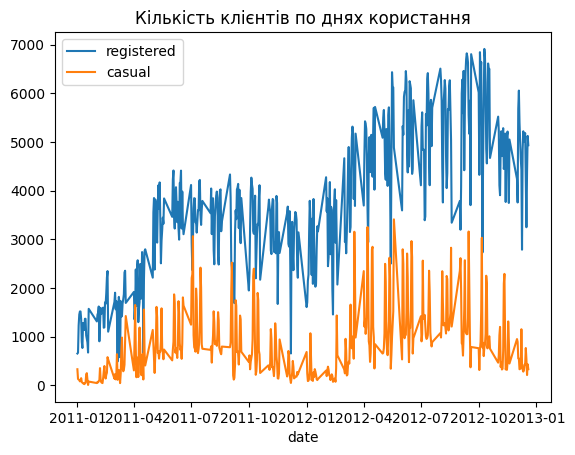

In [98]:
df_viz.plot()
plt.title('Кількість клієнтів по днях користання');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
